## Uber trip data from 2015(January - June)


The dataset file uber-raw-data-janjune-15.csv has the following column
* Dispatching_base_num : The TLC base company code of the base that dispatched the Uber
* Pickup_date : The date and time of the Uber pickup
* Affiliated_base_num : The TLC base company code affiliated with the Uber pickup
* locationID : The pickup location ID affiliated with the Uber pickup

The Base codes are for the following Uber bases

* B02512 : Unter
* B02598 : Hinter
* B02617 : Weiter
* B02682 : Schmecken
* B02764 : Danach-NY
* B02765 : Grun
* B02835 : Dreist
* B02836 : Drinnen

##  Data pre-processing/Data cleaning

In [1]:
#Import important library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Store the data in Uber valiable
Uber = pd.read_csv(r"C:\Users\Acer\Desktop\Data Analysis\Uber\Datasets/uber-raw-data-janjune-15.csv")

In [3]:
#Check sample data
Uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [4]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [5]:
#check number of column and row
Uber.shape

(14270479, 4)

In [6]:
#Check data type of dataset
type(Uber)

pandas.core.frame.DataFrame

In [7]:
#Check duplicated value
Uber.duplicated().sum()

898225

In [8]:
#Remove duplicated value
Uber.drop_duplicates(inplace=True)

In [9]:
#check number of column after removed dupicate value
Uber.shape

(13372254, 4)

In [10]:
#Check missing value
Uber.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     160702
locationID                   0
dtype: int64

In [11]:
#Remove missing value
Uber.dropna(axis=0, inplace=True)

In [12]:
#Check number of column after revove missing value
Uber.shape

(13211552, 4)

In [13]:
#Check data type each column
Uber.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [14]:
#Change data type of Pickup_date column
Uber['Pickup_date'] = pd.to_datetime(Uber['Pickup_date'])

In [15]:
#Add useful column
Uber['Month'] = Uber['Pickup_date'].dt.month_name()
Uber['Weekday'] = Uber['Pickup_date'].dt.day_name()
Uber['Day'] = Uber['Pickup_date'].dt.day
Uber['Hour'] = Uber['Pickup_date'].dt.hour
Uber['Minute'] = Uber['Pickup_date'].dt.minute

In [16]:
#Check sample data
Uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Weekday,Day,Hour,Minute
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,17,9,47


In [17]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13211552 entries, 0 to 14270478
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Dispatching_base_num  object        
 1   Pickup_date           datetime64[ns]
 2   Affiliated_base_num   object        
 3   locationID            int64         
 4   Month                 object        
 5   Weekday               object        
 6   Day                   int64         
 7   Hour                  int64         
 8   Minute                int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1008.0+ MB


## Exploration data analysis

1) Which month has the maximum number of Uber pickups in NYC?

Text(0.5, 1.0, 'Uber pickups in NYC By Month')

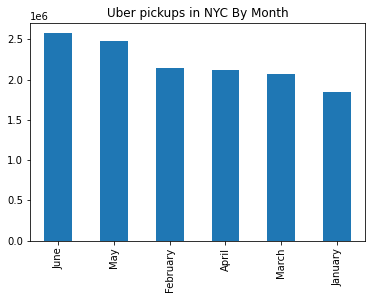

In [18]:
Uber['Month'].value_counts().plot(kind='bar')
plt.title('Uber pickups in NYC By Month')

Result : We observed the maximum number of Uber pickups between May and June.

2) Which Weekday has the maximum number of Uber pickups in NYC?

In [19]:
pivot = pd.crosstab(index = Uber['Month'], columns = Uber['Weekday'])
pivot

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,315002,238429,324545,273560,372522,250632,338015
February,360136,264693,354962,284432,323955,276956,276172
January,325261,182785,369693,219884,316857,188802,235869
June,371225,375312,399377,334434,357782,405500,328141
March,309631,269931,314785,313865,277026,320634,256767
May,430134,255501,464298,390391,337607,290004,316045


Text(0.5, 1.0, 'Uber pickups in NYC By Weekday of each Month')

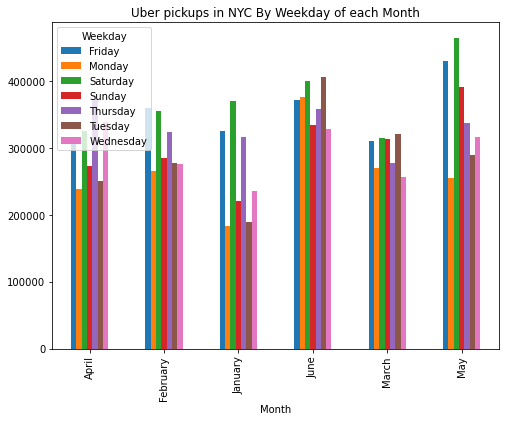

In [20]:
pivot.plot(kind='bar' , figsize=(8,6))
plt.title('Uber pickups in NYC By Weekday of each Month')

Result : We observed that the number on Saturday and Friday are peak each of month, It seems that people in NYC have a lot of activity these days (go shopping, go to the mall, go to hang out, e.g.).

3) Which hour is the peak for Uber pickup in NYC?

In [21]:
pivot = Uber.groupby(['Weekday', 'Hour'], as_index=False).size()
pivot.head()

,Weekday,Hour,size
0,Friday,0,78936
1,Friday,1,44064
2,Friday,2,26942
3,Friday,3,18845
4,Friday,4,22798


Text(0.5, 1.0, 'Uber pickups in NYC By Hour')

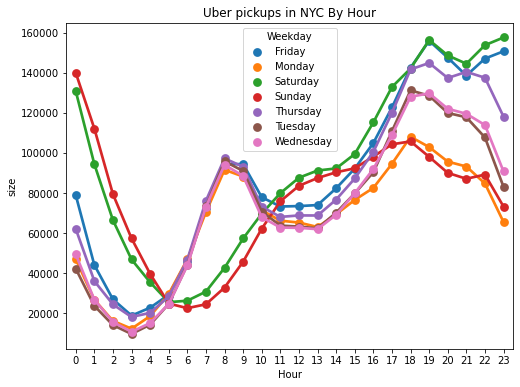

In [22]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Hour' , y='size', hue='Weekday' , data=pivot)
plt.title('Uber pickups in NYC By Hour')

Result : We observed that on working day(Mon-Fri) are the peak 2 time, at 7-8 am. and at 18-19 pm., It seem that match with time to go to work and time off work, the workers go home, so we can assume that that the most client of User on Monday to Friday are worker.

Interesting one point are Friday and Saturday around 22 pm. and 23 pm. are peak more than another day, It seems that the New Yorkers are starting their 'weekends' on Friday and Saturday nights

4) Which base number is the most Uber pickups?

Text(0.5, 1.0, 'The base number of Uber pickups in NYC')

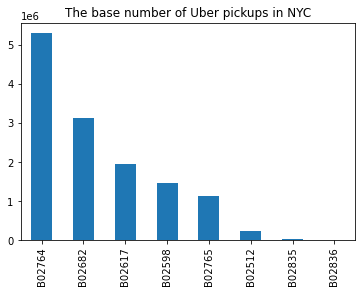

In [23]:
Uber['Dispatching_base_num'].value_counts().plot(kind='bar')
plt.title('The base number of Uber pickups in NYC')

Result : We observed that the most base number is B02764 (Danach-NY)

5) Which month the base number B02764 is peak?

In [24]:
base_nm = Uber[Uber['Dispatching_base_num'] == 'B02764']
base_nm.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Weekday,Day,Hour,Minute
1683,B02764,2015-03-17 08:24:00,B02764,236,March,Tuesday,17,8,24
1684,B02764,2015-03-17 08:25:00,B02764,181,March,Tuesday,17,8,25
1685,B02764,2015-03-17 08:25:00,B02715,249,March,Tuesday,17,8,25
1686,B02764,2015-03-17 08:25:00,B00448,165,March,Tuesday,17,8,25
1687,B02764,2015-03-17 08:25:00,B02764,114,March,Tuesday,17,8,25


Text(0.5, 1.0, 'The base number B02764 By Month')

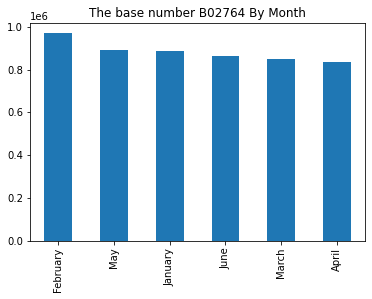

In [25]:
base_nm['Month'].value_counts().plot(kind='bar')
plt.title('The base number B02764 By Month')

Result : We observed that the base number B02764 (Danach-NY) have Uber pickups the most in February, May and January

## Conclusion

After we analyze the Uber pickups in NYC, we get the following information
* The Uber pickups are the highest in May and June.
* The Uber pickups are the highest on Saturday and Friday each month (Jan-Jun).
* People tend to use the user to go to work around 7-8 a.m. and go home around 18–19 p.m.
* The most common clients of users are workers.
* People have their weekend on Friday and Saturday nights.
* The maximum number of base numbers is B02764 (Danach-NY).
* The B02764 has a maximum number of Uber pickups in February, May, and January.